<a href="https://colab.research.google.com/github/aryanwalia2003/autoencoders/blob/main/denoising_images_autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D, UpSampling2D,Dropout

In [ ]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
print("x_train shape:",x_train.shape)
print("x_test shape", x_test.shape)

x_train shape: (60000, 28, 28)
x_test shape (10000, 28, 28)


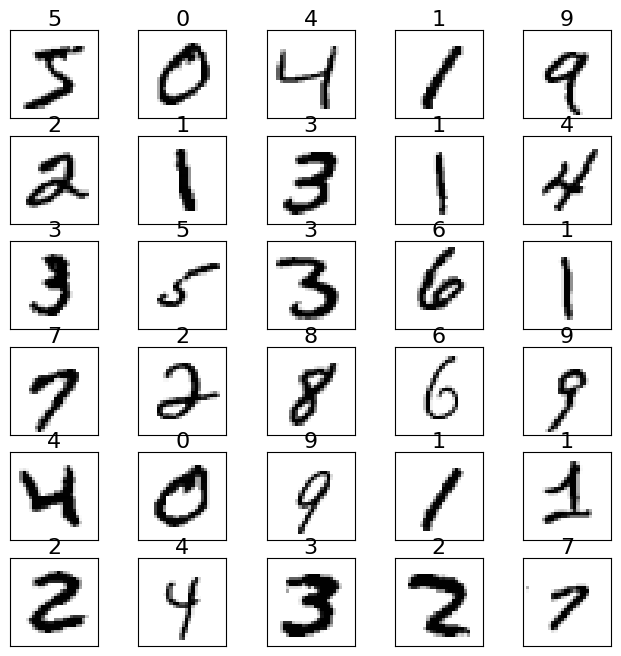

In [ ]:
plt.figure(figsize = (8,8))
for i in range(30):
  plt.subplot(6,5,i+1)
  plt.title(str(y_train[i]),fontsize = 16, color = 'black', pad = 2)
  plt.imshow(x_train[i], cmap = plt.cm.binary )
  plt.xticks([])
  plt.yticks([])

plt.show()

In [ ]:
val_images = x_test[:8000]
test_images = x_test[8000:]

#Normalising

In [ ]:
val_images = val_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0
train_images = x_train.astype("float32") / 255.0

#Reshaping


In [ ]:
val_images = np.reshape(val_images, (val_images.shape[0], 28, 28, 1))
test_images = np.reshape(test_images, (test_images.shape[0], 28, 28, 1))
train_images = np.reshape(train_images, (train_images.shape[0], 28, 28, 1))

#Adding Noise

In [ ]:
factor = 0.39
train_noisy_images = train_images + factor * np.random.normal(loc = 0.0, scale = 1.0, size = train_images.shape)
val_noisy_images = val_images + factor * np.random.normal(loc = 0.0, scale = 1.0, size = val_images.shape)
test_noisy_images = test_images + factor * np.random.normal(loc = 0.0, scale = 1.0, size = test_images.shape)

factor is the intensity of noise

loc=0.0 means mean =0 that is no bia in adding noise

size is ofc size


#Clipping

In [ ]:
train_noisy_images = np.clip(train_noisy_images, 0., 1.)
val_noisy_images = np.clip(val_noisy_images, 0., 1.)
test_noisy_images = np.clip(test_noisy_images, 0., 1.)

clip function performs the following:


It sets all pixel values below 0.0 to 0.0.

It sets all pixel values above 1.0 to 1.0

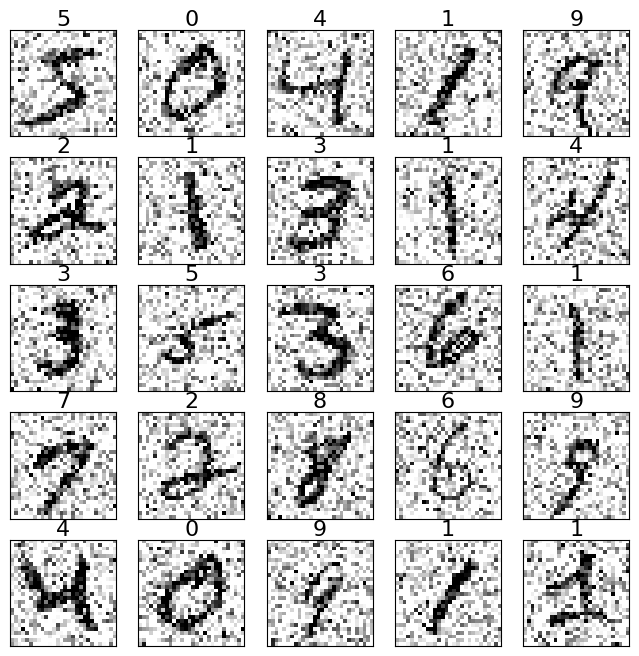

In [ ]:
plt.figure(figsize = (8,8))

for i in range(25):
      plt.subplot(5,5,i+1)
      plt.title(str(y_train[i]),fontsize = 16, color = 'black', pad = 2)
      plt.imshow(train_noisy_images[i].reshape(1,28,28)[0], cmap = plt.cm.binary )
      plt.xticks([])
      plt.yticks([])

plt.show()

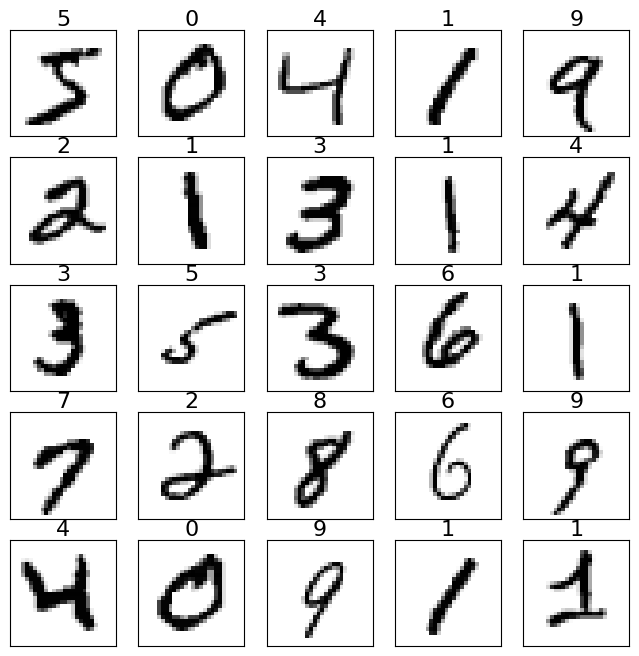

In [ ]:
plt.figure(figsize = (8,8))

for i in range(25):
      plt.subplot(5,5,i+1)
      plt.title(str(y_train[i]),fontsize = 16, color = 'black', pad = 2)
      plt.imshow(train_images[i].reshape(1,28,28)[0], cmap = plt.cm.binary )
      plt.xticks([])
      plt.yticks([])

plt.show()

In [ ]:
model = Sequential()
# encoder network
model.add(Conv2D(filters = 128, kernel_size = (2,2), activation = 'relu', padding = 'same', input_shape = (28,28,1)))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(filters = 128, kernel_size = (2,2), activation = 'relu', padding = 'same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(filters = 256, kernel_size = (2,2),strides = (2,2), activation = 'relu', padding = 'same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(filters = 256, kernel_size = (2,2), activation = 'relu', padding = 'same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(filters = 512, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(filters = 512, kernel_size = (2,2),strides = (2,2), activation = 'relu', padding = 'same'))

In [ ]:
# decoder network
model.add(Conv2D(filters = 512, kernel_size = (2,2), activation = 'relu', padding = 'same'))

model.add(tf.keras.layers.Conv2DTranspose(filters = 512, kernel_size = (2,2), strides = (2,2),activation = 'relu', padding = 'same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(filters = 256, kernel_size = (2,2), activation = 'relu', padding = 'same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(filters = 256, kernel_size = (2,2), activation = 'relu', padding = 'same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(filters = 128, kernel_size = (2,2), activation = 'relu', padding = 'same'))


model.add(tf.keras.layers.Conv2DTranspose(filters = 128, kernel_size = (2,2),strides = (2,2), activation = 'relu', padding = 'same'))
model.add(Conv2D(filters = 64, kernel_size = (2,2), activation = 'relu', padding = 'same'))
model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(filters = 1, kernel_size = (2,2), activation = 'relu', padding = 'same'))


# to get the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 128)       640       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 128)       512       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 128)       65664     
                                                                 
 batch_normalization_1 (Bat  (None, 28, 28, 128)       512       
 chNormalization)                                                
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 256)       131328    
                                                                 
 batch_normalization_2 (Bat  (None, 14, 14, 256)       1

In [ ]:
# Conv2D Layers
# For a Conv2D layer, the number of parameters is determined by:

# Number of Filters (F)
# Kernel Size (K x K)
# Number of Input Channels (C)
# Use of Bias
# The formula for calculating the parameters in a Conv2D layer is:
# Parameters=(K×K×C+1)×F
# The "+1" accounts for the bias term for each filter, if biases are used.

In [ ]:
OPTIMIZER =  tf.keras.optimizers.Adam(learning_rate = 0.001)
LOSS = 'mean_squared_error'
model.compile(optimizer =OPTIMIZER, loss = LOSS, metrics = ['accuracy'])

In [ ]:
EPOCHS = 5
BATCH_SIZE = 256
VALIDATION = (val_noisy_images, val_images)
history = model.fit(train_noisy_images, train_images,batch_size = BATCH_SIZE,epochs = EPOCHS, validation_data = VALIDATION)

Epoch 1/5
235/235 [==============================] - 113s 395ms/step - loss: 0.0541 - accuracy: 0.8042 - val_loss: 0.1116 - val_accuracy: 0.8101
Epoch 2/5
235/235 [==============================] - 87s 370ms/step - loss: 0.0094 - accuracy: 0.8142 - val_loss: 0.0449 - val_accuracy: 0.8135
Epoch 3/5
235/235 [==============================] - 87s 371ms/step - loss: 0.0083 - accuracy: 0.8144 - val_loss: 0.0081 - val_accuracy: 0.8163
Epoch 4/5
235/235 [==============================] - 89s 378ms/step - loss: 0.0078 - accuracy: 0.8145 - val_loss: 0.0085 - val_accuracy: 0.8157
Epoch 5/5
235/235 [==============================] - 87s 371ms/step - loss: 0.0075 - accuracy: 0.8146 - val_loss: 0.0082 - val_accuracy: 0.8157


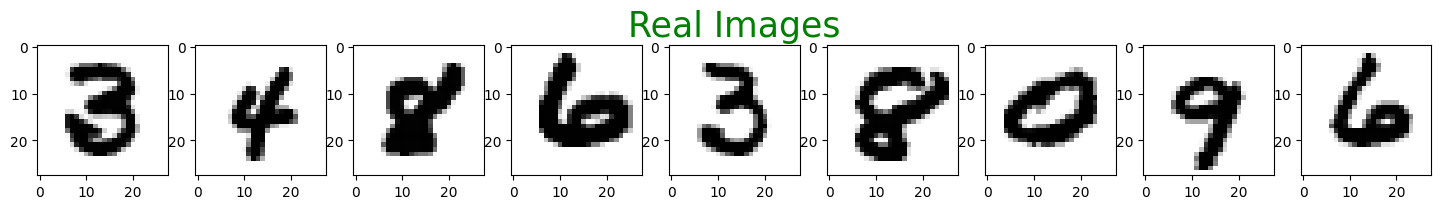

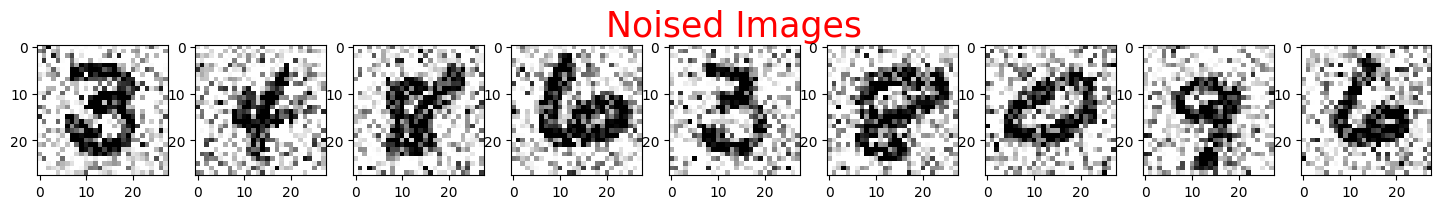

1/1 [==============================] - 0s 17ms/step


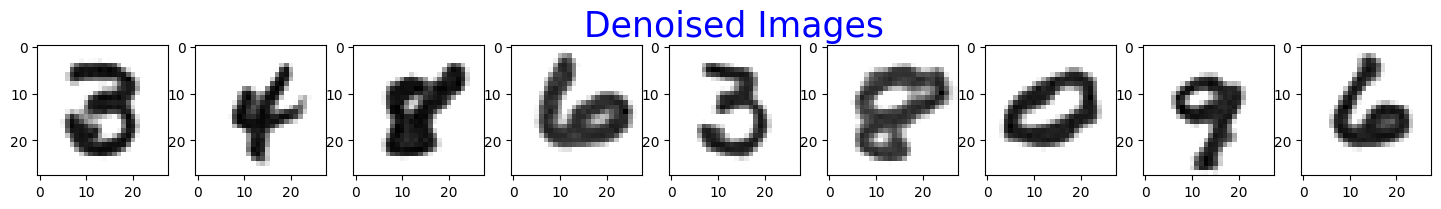

In [ ]:
plt.figure(figsize = (18,18))
for i in range(10,19):
    plt.subplot(9,9,i)
    if(i == 14):
        plt.title('Real Images', fontsize = 25, color = 'Green')
    plt.imshow(test_images[i].reshape(1,28,28)[0], cmap = plt.cm.binary)
plt.show()


plt.figure(figsize = (18,18))
for i in range(10,19):
    if(i == 15):
        plt.title('Noised Images', fontsize = 25, color = 'red')
    plt.subplot(9,9,i)
    plt.imshow(test_noisy_images[i].reshape(1,28,28)[0], cmap = plt.cm.binary)
plt.show()

plt.figure(figsize = (18,18))
for i in range(10,19):
    if(i == 15):
        plt.title('Denoised Images', fontsize = 25, color = 'Blue')

    plt.subplot(9,9,i)
    plt.imshow(model.predict(test_noisy_images[i].reshape(1,28,28,1)).reshape(1,28,28)[0], cmap = plt.cm.binary)
plt.show()